In [ ]:
# install lang mga need na requirments
!pip install requests opencv-python-headless python-dotenv matplotlib ipywidgets


In [ ]:
import os
import requests
import cv2
import numpy as np
import json
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Load API key from .env (or paste directly)
load_dotenv()
API_KEY = "jo3N7VAQxr1AQoMYJISq"

# Roboflow model info
MODEL_ID = "tooth-detection-t8kyk"   # 👈 replace with your actual model ID from Roboflow
MODEL_VERSION = "2"


In [3]:
def detect_teeth_with_braces(image_path):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image path or unreadable image.")

    # Send image to Roboflow API
    url = f"https://detect.roboflow.com/{MODEL_ID}/{MODEL_VERSION}"
    params = {"api_key": API_KEY, "confidence": 40, "overlap": 30}
    _, encoded_image = cv2.imencode(".jpg", image)
    response = requests.post(url, files={"file": encoded_image.tobytes()}, params=params)

    result = response.json()
    predictions = result.get("predictions", [])
    print(f"🦷 Detected {len(predictions)} teeth regions")

    # For each detected teeth region, draw braces
    for pred in predictions:
        x, y, w, h = int(pred["x"]), int(pred["y"]), int(pred["width"]), int(pred["height"])
        x1, y1 = x - w//2, y - h//2
        x2, y2 = x + w//2, y + h//2

        # Draw bounding box (optional, can comment out)
        cv2.rectangle(image, (x1, y1), (x2, y2), (173, 216, 230), 2)
        cv2.putText(image, "Teeth", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (173, 216, 230), 2)

        # ---- Simulate Braces ----
        num_braces = 8  # how many brackets across the teeth
        brace_color = (200, 200, 200)  # light gray metal color
        line_thickness = 2

        # Horizontal main wire
        mid_y = y  # middle line across the teeth region
        cv2.line(image, (x1, mid_y), (x2, mid_y), brace_color, line_thickness)

        # Small vertical brackets evenly spaced
        spacing = (x2 - x1) // (num_braces + 1)
        for i in range(1, num_braces + 1):
            bx = x1 + i * spacing
            bracket_height = h // 5
            cv2.line(image, (bx, mid_y - bracket_height), (bx, mid_y + bracket_height), brace_color, line_thickness)
    
    return image, len(predictions)


🦷 Detected 1 teeth regions


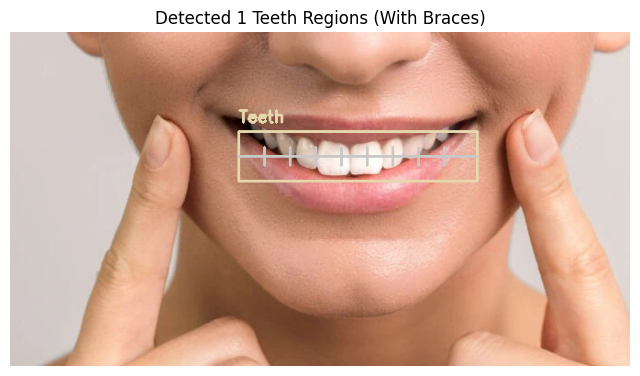

In [6]:
image_path = "sadsad.jpg"  # 👈 your test image
output_img, count = detect_teeth_with_braces(image_path)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Detected {count} Teeth Regions (With Braces)")
plt.show()
